# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

**Additional hypotheses**
- Number of dependents
    - the more dependents the less likely you will pay off the loan
    - less disposable income
    - smaller chance of approval?
- Applicants who are not self-employed have more steady income

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

path = '../data/loans.csv'
df = pd.read_csv(path) 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [2]:
df.shape

(614, 13)

In [3]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# checking for duplicate loan ids
n_unique = df['Loan_ID'].nunique()
n_obs = df.shape[0]

dups = n_obs - n_unique
dups

0

In [6]:
df_copy = df.copy()

In [7]:
df_copy.drop('Loan_ID', axis=1, inplace=True)

Look at some basic statistics for numerical variables.

In [8]:
df_copy.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)

# of applicants with no credit history: 89
# of applicants with credit history: 475


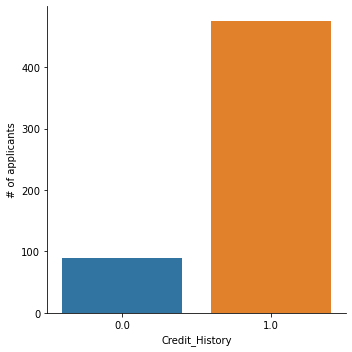

In [9]:
num_history = df_copy['Credit_History'].value_counts()

print(f'# of applicants with no credit history: {num_history[0]}')
print(f'# of applicants with credit history: {num_history[1]}')

ax = sns.catplot(x='Credit_History', kind='count', data=df_copy)
ax.set(ylabel='# of applicants')

plt.show()

Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?

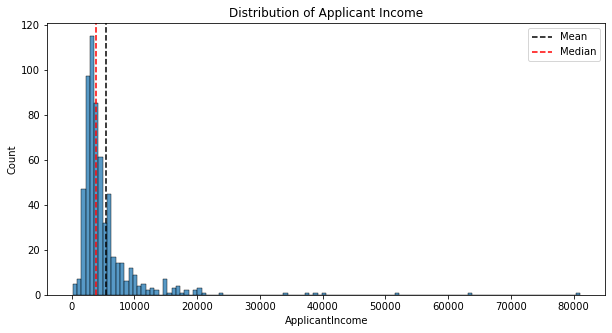

In [10]:
# Applicant income
plt.figure(figsize=(10,5))

sns.histplot(df_copy.ApplicantIncome)
plt.axvline(df_copy.ApplicantIncome.mean(), color='k', linestyle='--', label='Mean')
plt.axvline(df_copy.ApplicantIncome.median(), color='r', linestyle='--', label='Median')

plt.title('Distribution of Applicant Income')
plt.legend()

plt.show()

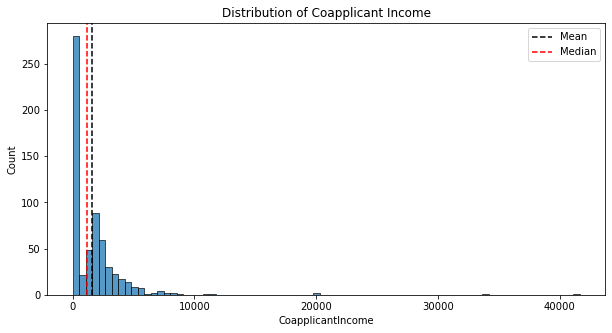

In [11]:
# Coapplicant income
plt.figure(figsize=(10,5))

sns.histplot(df_copy.CoapplicantIncome)
plt.axvline(df_copy.CoapplicantIncome.mean(), color='k', linestyle='--', label='Mean')
plt.axvline(df_copy.CoapplicantIncome.median(), color='r', linestyle='--', label='Median')

plt.title('Distribution of Coapplicant Income')
plt.legend()

plt.show()

For both applicant and coapplicant income, the distributions are right skewed. The median is less than the mean, so more than 50% of the applicants/coapplicants make less than the average income. The distribution of the incomes seem to be in line with expectations. There are some extreme values which indicate that there are some higher income applicants compared to the rest of the other applicants.

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [12]:
categoricals = df_copy.dtypes[df.dtypes=='object'].index.tolist()

# for col in df_copy[categoricals]:
#     print(df_copy[col].value_counts(), '\n')

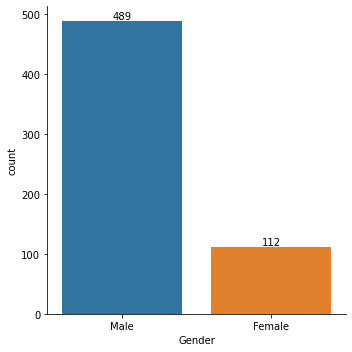

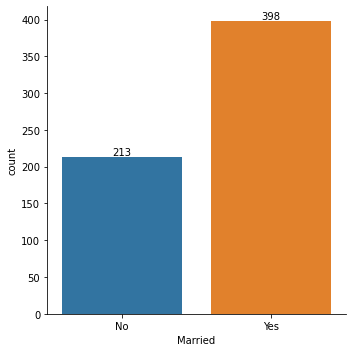

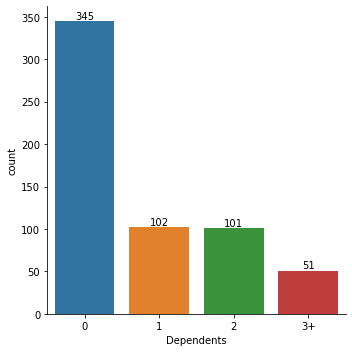

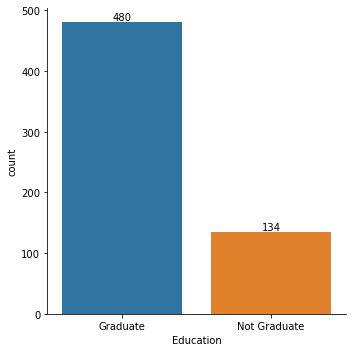

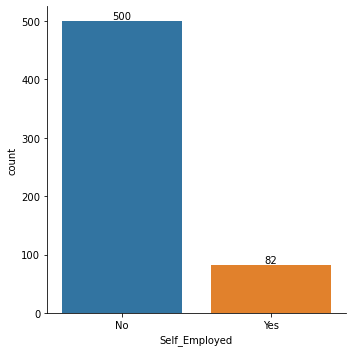

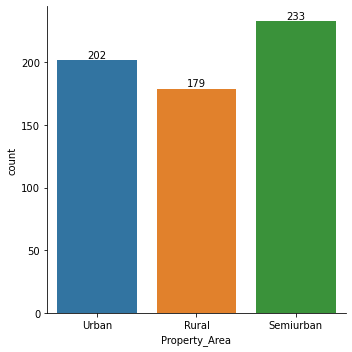

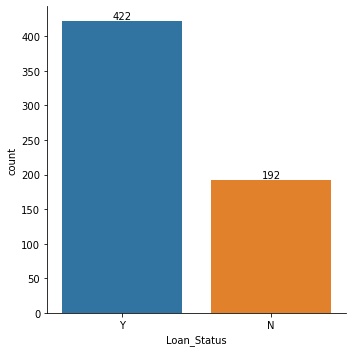

In [13]:
for col in df_copy[categoricals]:
    graph = sns.catplot(x=col, kind='count', data=df_copy)
    
    ax = graph.facet_axis(0,0)
    for container in ax.containers:
        labels = [f'{(height.get_height())}' for height in container]
        ax.bar_label(container, labels=labels, label_type='edge')

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



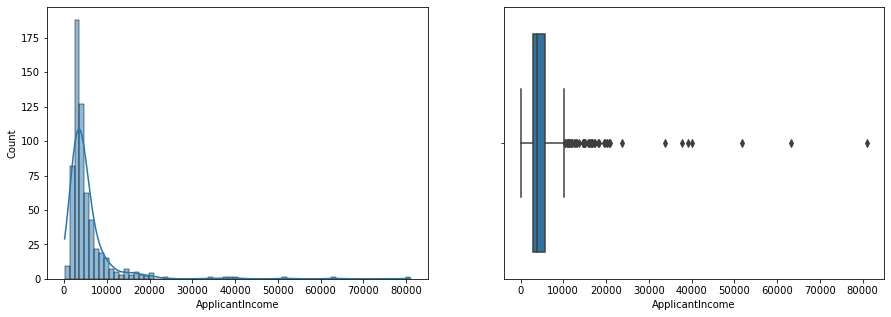

In [14]:
n_bins = 70

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.histplot(x='ApplicantIncome', bins=n_bins, kde=True, ax=ax[0], data=df_copy)
sns.boxplot(x='ApplicantIncome', ax=ax[1], data=df_copy)

plt.show()

For lower number of bins, the distribution shows a high count of primary applicants who are in the lowest income bracket. The distribution is seen more clearly when there are 50 or more bins.

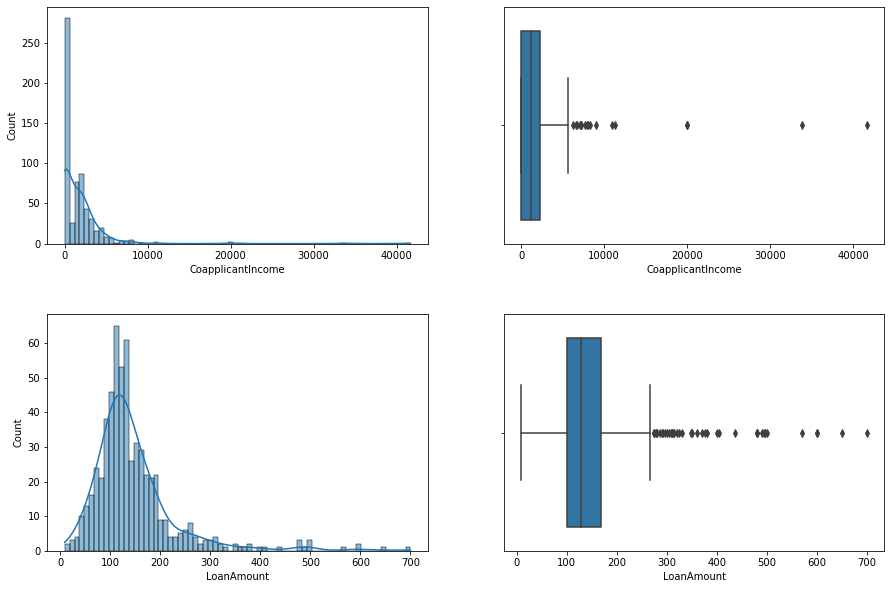

In [15]:
# distribution and boxplot of coapplicant income and loan amount
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
fig.subplots_adjust(hspace=0.3)

sns.histplot(x='CoapplicantIncome', bins=n_bins, kde=True, ax=ax[0,0], data=df_copy)
sns.histplot(x='LoanAmount', bins=n_bins, kde=True, ax=ax[1,0], data=df_copy)

sns.boxplot(x='CoapplicantIncome', ax=ax[0,1], data=df_copy)
sns.boxplot(x='LoanAmount', ax=ax[1,1], data=df_copy)

plt.show()


Look at box plots to understand the distributions. 

<AxesSubplot:xlabel='Gender', ylabel='CoapplicantIncome'>

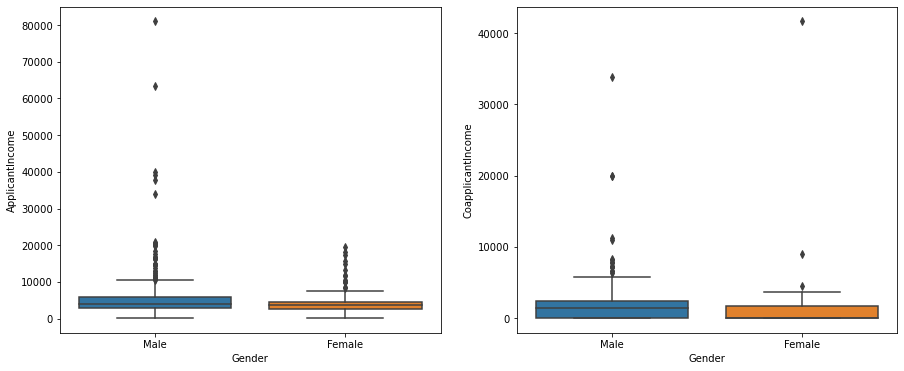

In [16]:
# income by gender
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

sns.boxplot(x='Gender', y='ApplicantIncome', ax=ax[0], data=df_copy)
sns.boxplot(x='Gender', y='CoapplicantIncome', ax=ax[1], data=df_copy)

Look at the distribution of income segregated  by `Education`

<AxesSubplot:xlabel='Education', ylabel='CoapplicantIncome'>

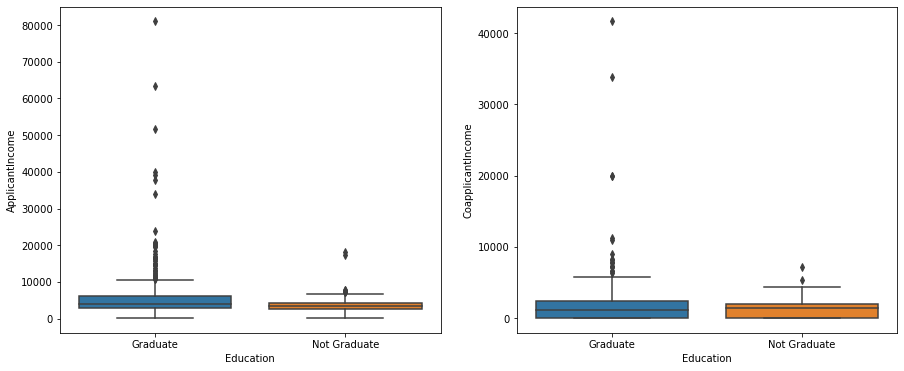

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

sns.boxplot(x='Education', y='ApplicantIncome', ax=ax[0], data=df_copy)
sns.boxplot(x='Education', y='CoapplicantIncome', ax=ax[1], data=df_copy)

Although there are extreme values of income for both graduates and non-graduates, graduates tend to earn more.

Look at the histogram and boxplot of LoanAmount

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

**Loan Status based on Level of Education and Average Income**

In [18]:
pd.pivot_table(df_copy, 
               values=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'],
               index=['Education', 'Loan_Status'],
               aggfunc=np.mean)

ApplicantIncome  CoapplicantIncome  LoanAmount
Education    Loan_Status                                                
Graduate     N                6114.514286        2111.028571  161.388060
             Y                5751.576471        1555.423294  151.093656
Not Graduate N                3646.442308        1249.903846  122.234043
             Y                3860.256098        1293.439024  116.162500

Text(0.5, 1.0, 'Loan Status by Education')

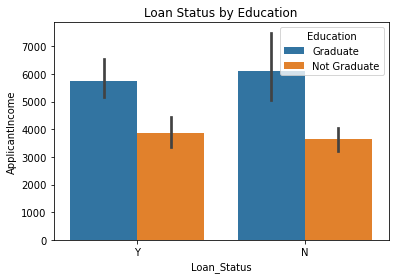

In [19]:
sns.barplot(x='Loan_Status', 
            y='ApplicantIncome', 
            hue='Education', 
            data=df_copy).set_title('Loan Status by Education')

The expectation is that graduates who have a higher income are likely to be approved for a loan. However, the average income of graduates who are not approved is higher than that of those who are approved.

**Loan Status of Self-Employed Applicants**

In [55]:
pd.pivot_table(df_copy, 
               values=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'],
               index=['Self_Employed', 'Loan_Status'],
               aggfunc=np.mean)

ApplicantIncome  CoapplicantIncome  LoanAmount
Self_Employed Loan_Status                                                
No            N                5346.620482        1888.439759  149.048193
              Y                4986.224044        1526.923279  138.737705
Yes           N                6081.076923        1809.923077  155.269231
              Y                7984.267857        1358.071429  177.410714

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

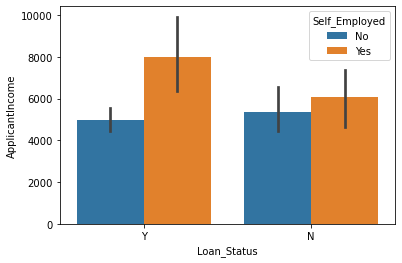

In [56]:
sns.barplot(x='Loan_Status', 
            y='ApplicantIncome', 
            hue='Self_Employed', 
            data=df_copy)

Self-employed applicants have a higher income, on average.

**Loan Status of Applicants with Dependents**

In [22]:
pd.pivot_table(df_copy, 
               values=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'],
               index=['Dependents', 'Loan_Status'],
               aggfunc=np.mean)

ApplicantIncome  CoapplicantIncome  LoanAmount
Dependents Loan_Status                                                
0          N                5071.112150        1596.943925  141.831683
           Y                4848.327731        1635.723193  133.309013
1          N                6211.305556        1832.972222  163.571429
           Y                5826.439394        1204.378788  155.873016
2          N                4073.360000        1599.040000  144.217391
           Y                5207.513158        1716.260526  152.066667
3+         N                8485.833333        4290.111111  199.687500
           Y                8633.242424         788.424242  186.636364

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

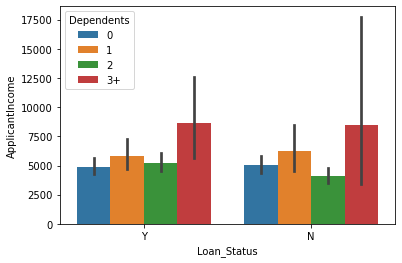

In [23]:
sns.barplot(x='Loan_Status', 
            y='ApplicantIncome', 
            hue='Dependents', 
            data=df_copy)

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [24]:
# checking missing values again
df_copy.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
# replace with mode for categorical columns
for cat in df_copy[categoricals]:
    df_copy[cat].fillna(df_copy[cat].mode()[0], inplace=True)

df_copy['Credit_History'].fillna(df_copy['Credit_History'].mode()[0], inplace=True)

# replace with median for numerical columns
df_copy['LoanAmount'].fillna(df_copy['LoanAmount'].median(), inplace=True)
df_copy['Loan_Amount_Term'].fillna(df_copy['Loan_Amount_Term'].median(), inplace=True)

In [26]:
df_copy.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

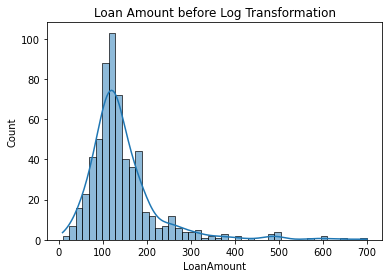

In [27]:
sns.histplot(x='LoanAmount', kde=True, data=df_copy).set_title('Loan Amount before Log Transformation')

plt.show()

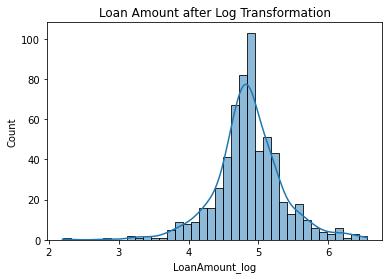

In [28]:
df_copy['LoanAmount_log'] = np.log(df_copy['LoanAmount'])

sns.histplot(x='LoanAmount_log', kde=True, data=df_copy).set_title('Loan Amount after Log Transformation')

plt.show()

Combine both incomes as total income and take a log transformation of the same.

In [29]:
df_copy['Total_Income'] = df_copy['ApplicantIncome'] + df_copy['CoapplicantIncome']

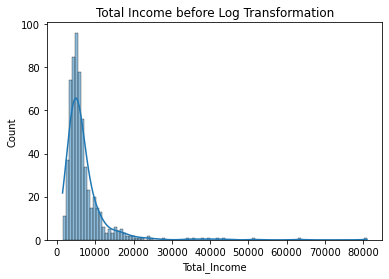

In [30]:
sns.histplot(x='Total_Income', kde=True, data=df_copy).set_title('Total Income before Log Transformation')

plt.show()

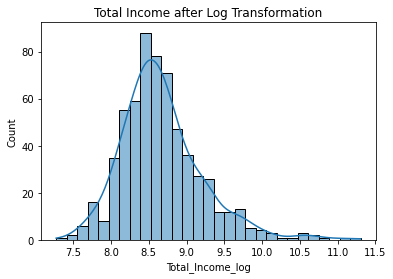

In [31]:
df_copy['Total_Income_log'] = np.log(df_copy['Total_Income'])

sns.histplot(x='Total_Income_log', kde=True, data=df_copy).set_title('Total Income after Log Transformation')

plt.show()

In [33]:
categoricals.append('Credit_History')
categoricals.remove('Loan_Status')

In [34]:
numericals = list(set(df.columns) - set(categoricals) - {'Loan_Status', 'Loan_ID'})

In [35]:
print(categoricals)
print(numericals)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']
['ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount', 'CoapplicantIncome']


## 4. Building a Predictive Model

In [32]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [36]:
le = LabelEncoder()
y = le.fit_transform(df['Loan_Status'])
X = df.drop(['Loan_Status', 'Loan_ID'], axis=1)

In [55]:
le.inverse_transform([0, 1])

array(['N', 'Y'], dtype=object)

The target values are represented with N = 0 and Y = 1.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Try paramater grid search to improve the results

In [39]:
# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEngineer(BaseEstimator, TransformerMixin):
#     def __init__(self):
#         pass
    
#     def fit(self, X, y=None):
#         return self
    
#     def transform(self, X, y=None):
#         X['Total_Income'] = X['ApplicantIncome'] + X['CoapplicantIncome']
#         X['Total_Income_log'] = np.log(X['Total_Income'])
#         X['LoanAmount_log'] = np.log(X['LoanAmount'])
        
#         return X
    
#     def fit_transform(self, X, y=None):
#         self.fit(X)
#         return self.transform(X)

In [40]:
numeric_transformer = Pipeline([
                          ('fill_na', SimpleImputer(strategy='median')),
                          #('feature_engineer', FeatureEngineer()),
                          ('scaler', StandardScaler())
                         ])

In [41]:
categoric_transformer = Pipeline([
                            ('fill_na', SimpleImputer(strategy='most_frequent')),
                            ('encoding', OneHotEncoder(sparse=False, handle_unknown='ignore'))
                           ])

In [43]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer , numericals),
    ('cat',categoric_transformer, categoricals)  
    ])

In [44]:
classifiers_test = [LogisticRegression(), RandomForestClassifier()]

In [45]:
combined_features = FeatureUnion([('pca', PCA()),
                                  ('kbest', SelectKBest())
                                 ])
                                  
pipeline = Pipeline([('preprocessor', preprocessor),
                    ('features', combined_features),
                    ('classifier', LogisticRegression())])

param_grid = [{'features__pca__n_components': [2, 3, 5],
             'features__kbest__k': [2, 3, 5],
             'classifier': [LogisticRegression()]},
             
             {'features__pca__n_components': [2, 3, 5],
             'features__kbest__k': [2, 3, 5],
             'classifier': [RandomForestClassifier()],
             'classifier__n_estimators': [2, 5, 10],
             'classifier__max_depth': [2, 4, 6]}]

In [46]:
gridsearch = GridSearchCV(pipeline, param_grid, cv=5).fit(X_train, y_train)

In [47]:
gridsearch.best_params_

{'classifier': RandomForestClassifier(max_depth=6, n_estimators=10),
 'classifier__max_depth': 6,
 'classifier__n_estimators': 10,
 'features__kbest__k': 2,
 'features__pca__n_components': 3}

In [48]:
gridsearch.best_score_

0.8251436388508893

In [49]:
import pickle

pickle.dump(gridsearch, open('model_v1.p', 'wb'))

In [50]:
y_hat = gridsearch.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_hat)

accuracy

0.7945945945945946

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [52]:
json_data = {
    'Gender': 'Male',
    'Married': 'Yes',
    'Dependents': '0',
    'Education': 'Graduate',
    'Self_Employed': 'Yes',
    'ApplicantIncome': 3000,
    'CoapplicantIncome': 0.0,
    'LoanAmount': 66.0,
    'Loan_Amount_Term': 360.0,
    'Credit_History': '1.0',
    'Property_Area': 'Urban'
}

In [53]:
import requests

# url = 'http://ec2-35-183-97-170.ca-central-1.compute.amazonaws.com:5000/approval'
url = 'http://127.0.0.1:5000/approval'

r = requests.post(url=url, json=json_data)

In [54]:
result = r.json()

result

[1]